### Corrélation entre expériences

In [43]:
% run outils_stage.py # les fonctions perso et les imports
% matplotlib inline

In [45]:
liste_fichiers = ['PCO.csv', 'CW.csv', 'DE.csv']

In [46]:
df_dict = import_df(liste_fichiers, dossier = 'df')

In [27]:
def end(df1, df2):
    """
    Renvoie la longueur de la df la plus petite.
    """
    return min(len(df1), len(df2))

In [32]:
def plot_corr(exp1, exp2, df_dict):
    """
    Affiche les fonctions de corrélation entre toutes les variables pour
    les deux expériences.
    df_dict est un dictionnaire de dataframe (sortie de l'import).
    """
    liste_var = list(df_dict[exp1].columns[1:])
    corr = {}
    
    for var in liste_var:
        df1 = df[exp1][var]
        df2 = df[exp2][var]

        maxi = end(df1, df2)
        corr[var] = sm.tsa.stattools.ccf(df1[:maxi], df2[:maxi])
        
    fig = plt.figure(figsize=(20, 10))
    t = df_dict[exp1]['t'][:maxi]
    ax = {}
    i = 1
    for var in liste_var:
        ax[var] = fig.add_subplot(int('22' + str(i)))
        ax[var].set_title(var)
        i += 1
        ax[var].plot(t, corr[var], color = "Blue", alpha = 0.7)
        
    plt.suptitle(exp1 + '_' + exp2, fontsize = 40)

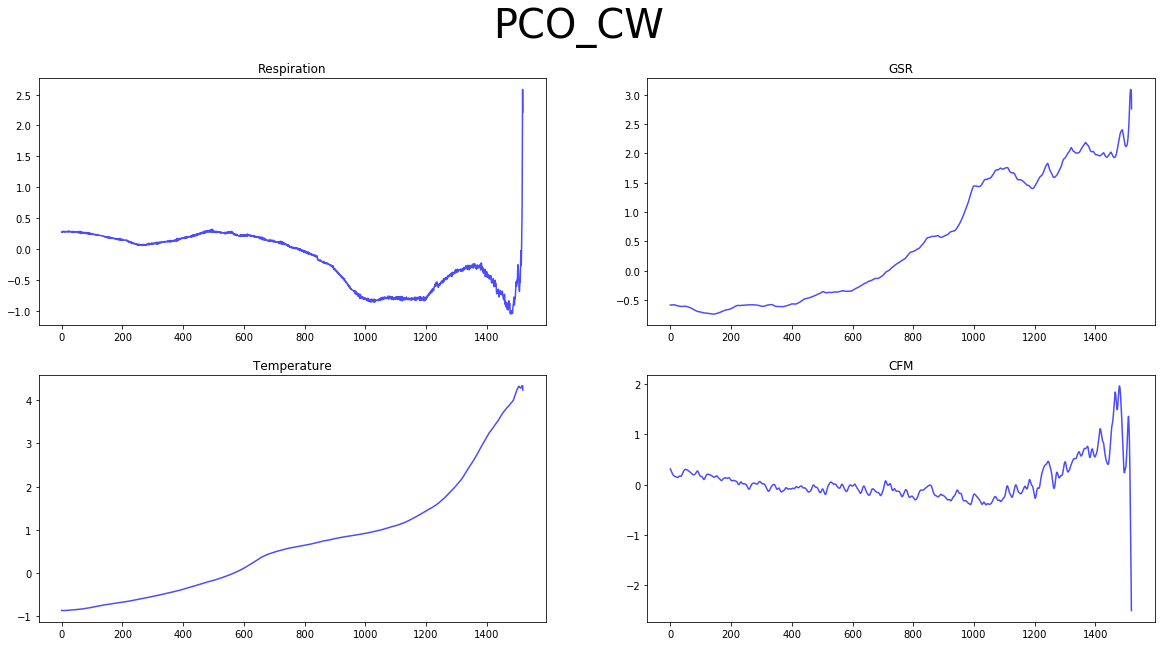

In [33]:
plot_corr('PCO', 'CW', df_dict)

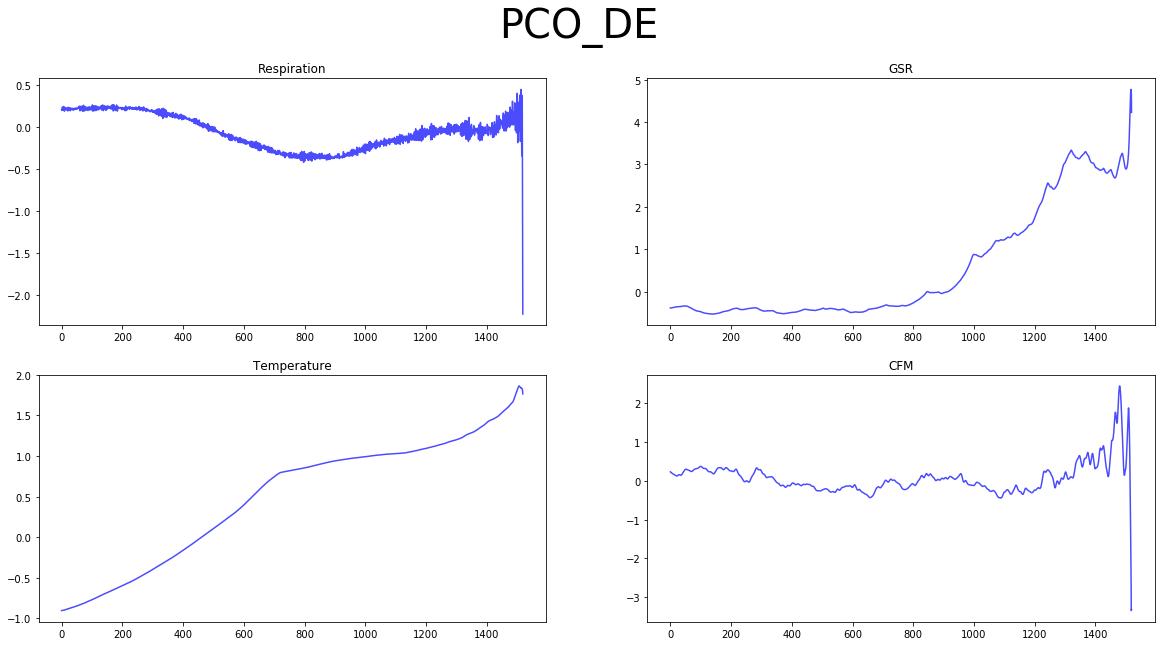

In [34]:
plot_corr('PCO', 'DE', df_dict)

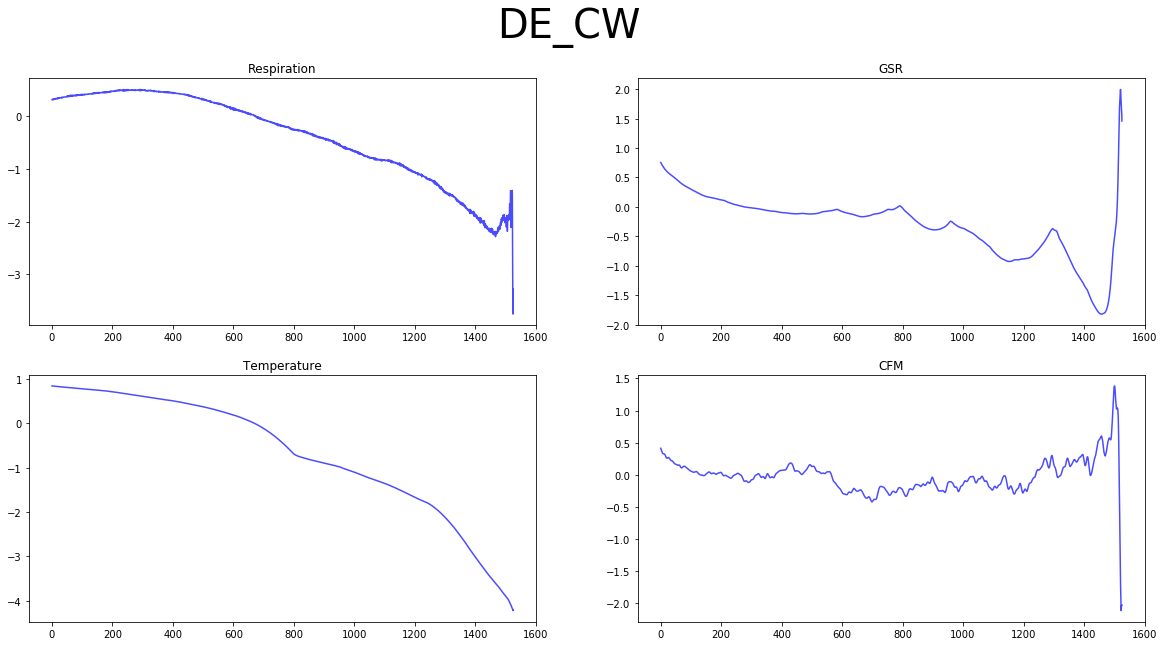

In [35]:
plot_corr('DE', 'CW', df_dict)

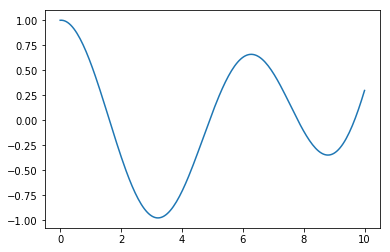

In [42]:
X = np.linspace(0,10, 200)
Y1 = np.sin(X)
Y2 = np.sin(X)
fig = plt.figure()
ax = fig.add_subplot(111)
C = sm.tsa.stattools.ccf(Y1, Y2)
ax.plot(X, C)